# Week 9 Problem 3

A few things you should keep in mind when working on assignments:

1. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed or overwritten by the autograder.

2. Before you submit your assignment, make sure everything runs as expected. Go to menubar, select *Kernel*, and restart the kernel and run all cells (*Restart & Run all*).

3. Do not change the title (i.e. file name) of this notebook.

4. Make sure that you save your work (in the menubar, select *File* → *Save and CheckPoint*)

5. When you are ready to submit your assignment, go to *Dashboard* → *Assignments* and click the *Submit* button. Your work is not submitted until you click *Submit*.

6. You are allowed to submit an assignment multiple times, but only the most recent submission will be graded.

7. **If your code does not pass the unit tests, it will not pass the autograder.**

## Author: John Nguyen
### Primary Reviewer: Radhir Kothuri

# Due Date: 6 PM, March 26, 2018

In [2]:
import numpy as np
import string
import collections
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.corpus import inaugural
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.stem.snowball import SnowballStemmer
from sklearn.manifold import TSNE

from nose.tools import (
    assert_equal,
    assert_is_instance,
    assert_almost_equal,
    assert_true
)
from numpy.testing import assert_array_equal

# Download the stopwords
nltk.download('stopwords');

# Download inaugural address
nltk.download('inaugural');

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/data_scientist/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     /home/data_scientist/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


We will analyze the NLTK Inaugural Address Corpus which contains a collection of 55 texts, one for each presidential address starting from 1789. Please refer to the [Inaugural Address Corpus documentation](http://www.nltk.org/book/ch02.html#inaugural-corpus) for more information. By the end of the assignment, our goal is to answer the following question: __Which inaugural addresses were most closely related?__ That is, we will use text mining in order to group similar inaugural addresses.

In [3]:
# Load in the corpus
from nltk.corpus import inaugural

# View the number of files
print(len(inaugural.fileids()))

# View the list of files
print(inaugural.fileids())

56
['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Re

In [4]:
# View Obama's first inauguration address
inaugural.raw('2009-Obama.txt')

'My fellow citizens:\n\nI stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.\n\nForty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because We the People have remained faithful to the ideals of our forbearers, and true to our founding documents.\n\nSo it has been. So it must be with this generation of Americans.\n\nThat we are in the midst of crisis is now well understood. Our nation is at war, against a far-reaching network of violence and hatred. Our economy is badly weakened

In [5]:
# Create the documents for analysis
documents = []
for doc in inaugural.fileids():
    documents.append(inaugural.raw(doc))

## Question 1: Tokenizing
 
Create the function <i>process_text()</i> which tokenize an inputted string. Your function should remove  punctuations and apply stemming via the [Snowball Stemmer](http://www.nltk.org/howto/stem.html) with 'english' as the language. Your function should return the tokens as a map object.

__Hint:__ Refer to this week's notebook on creating the tokenizer.

In [6]:
def process_text(text):
    '''
    Converts text into tokens. Remove punctuation and use the Snowball Stemmer.
    
    Parameters
    ----------
    text: a string.
    
    Returns
    -------
    tokens: a map object.    
    '''

    # YOUR CODE HERE
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token not in string.punctuation]
    stemmer = SnowballStemmer("english")
    stems = map(stemmer.stem, tokens)

    return stems

In [7]:
test_sentence1 = "This is a simple test sentence."
test_tokens1 = process_text(test_sentence1)
assert_equal(type(test_tokens1), map)
assert_equal(list(test_tokens1), ['this', 'is', 'a', 'simpl', 'test', 'sentenc'])

test_sentence2 = "Text mining, also referred to as text data mining, roughly equivalent to text analytics, is the process of deriving high-quality information from text. High-quality information is typically derived through the devising of patterns and trends through means such as statistical pattern learning."
test_tokens2 = process_text(test_sentence2)
assert_equal(type(test_tokens2), map)
assert_equal(list(test_tokens2), ['text', 'mine', 'also', 'refer', 'to', 'as', 'text', 'data', 'mine', 'rough',
                                  'equival', 'to', 'text', 'analyt', 'is', 'the', 'process', 'of', 'deriv',
                                  'high-qual', 'inform', 'from', 'text', 'high-qual', 'inform', 'is', 'typic',
                                  'deriv', 'through', 'the', 'devis', 'of', 'pattern', 'and', 'trend', 'through',
                                  'mean', 'such', 'as', 'statist', 'pattern', 'learn'])

## Question 2: TF-IDF

Apply TF-IDF vectorization to the text document (e.g., an inaugural address). To pass all assertions, make sure you have the following:

- Apply the tokenizer from Question 1
- Use English stop words. For the <i>stop_words</i> parameter you need to pass a list. You may pass stopwords.words('english') which we've already loaded.
- Set <i>min_df=3</i> to ignore terms with document frequency strictly lower than 3.
- Set <i>max_df=0.5</i> ignore terms that have a document frequency strictly higher than 90%.
- Set <i>max_features=2000</i>.
- Use unigram and bigram.
- Convert all characters to lowercase.
- Fit the vectorizer to the text document using <i>fit_transform()</i> to return the term-document matrix.
- Return the vectorizer object as well as the tf-idf matrix.

__Note:__ Be sure to examine the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to learn about the parameters. For example, we can use absolute values or proportion as thresholds when setting the minimum and maximum thresholds.

In [23]:
def apply_tfidf(docs):
    '''
    Transform text documents into tf-idf coordinates.
    
    Parameters
    ----------
    docs: A text document
    
    Returns
    -------
    vectorizer: a TfidfVectorizer object
    tfidf_matrix: a scipy.csr_matrix object
    '''
    # YOUR CODE HERE
    tf = TfidfVectorizer(tokenizer=process_text, ngram_range=(1,2), lowercase=True, 
                         max_df=0.5, min_df=3, max_features=2000, stop_words=stopwords.words('english'))
    tfidf_matrix = tf.fit_transform(docs)
    return tf, tfidf_matrix

In [24]:
# Perform TD-IDF on All Documents
documents_vectorizer, documents_tfidf = apply_tfidf(documents)

# Make sure the vectorizer parameters are correct
assert_equal(documents_vectorizer.max_df, 0.5)
assert_equal(documents_vectorizer.min_df, 3)
assert_equal(documents_vectorizer.max_features, 2000)
assert_equal(documents_vectorizer.ngram_range, (1, 2))
assert_equal(documents_vectorizer.lowercase, True)

# Make sure the dimension of the matrix is correct
assert_equal(documents_tfidf.shape, (56, 2000))

# Make sure the objects returned are correct
assert_equal(type(documents_vectorizer), TfidfVectorizer)
assert_equal(type(documents_tfidf), csr_matrix)

# Check parts of the matrix
assert_almost_equal(documents_tfidf[0, 719], 0.0401962149395, 3)
assert_almost_equal(documents_tfidf[55, 625], 0.0642302942599, 3)
assert_almost_equal(documents_tfidf[0, 864], 0.0486540286637, 3)

## Question 3: Clustering

We will apply K-means clustering to the tf-idf matrix. Create the function <i>cluster_texts()</i> which takes the tf-idf matrix from Question 2 as well as the number of clusters as input. The function will fit a KMeans model with the specific number of clusters to the tf-idf matrix and set the <i>random_state</i> to be 0. (note, keep all other parameters default). Output the fitted model.

In [27]:
def cluster_texts(tfidf_matrix, num_clusters):
    '''
    Perform K-Means clustering
    
    Parameters
    ----------
    tfidf_model: a scipy.csr_matrix object representing the tf-idf matrix
    num_clusters: a int specifying the number of clusters for K-Means
    
    Returns
    -------
    km_model: a KMeans object  
    '''
    # YOUR CODE HERE
    km = KMeans(n_clusters=num_clusters, random_state=0)
    km_model = km.fit(tfidf_matrix)
    return km_model

In [28]:
cluster_documents = cluster_texts(documents_tfidf, 3)
assert_equal(type(cluster_documents), KMeans)
assert_equal(cluster_documents.n_clusters, 3)
assert_equal(cluster_documents.random_state, 0)
assert_equal(list(cluster_documents.labels_), [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
                                               0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
                                               2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
                                               2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
                                               1, 1, 1, 1, 1, 1, 1, 1])

cluster_documents2 = cluster_texts(documents_tfidf, 5)
assert_equal(type(cluster_documents2), KMeans)
assert_equal(cluster_documents2.n_clusters, 5)
assert_equal(cluster_documents2.random_state, 0)
assert_equal(list(cluster_documents2.labels_), [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                                                3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
                                                3, 3, 3, 2, 3, 1, 1, 2, 2, 2, 2, 2, 2,
                                                0, 2, 2, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4,
                                                4, 0, 0, 0])

## Results & Visualization

So, which presidential inaugural address were most similar? Let us view the clustering results for 3 clusters. Notice how the addresses are grouped based on the time period (e.g., the early addresses have the same label).

In [29]:
cluster_documents.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Below we show the top 20 tokens for the clusters. Notice the different in terms between the clusters indicating the time period certain issues might be at the forefront (e.g., `women` in Cluster 1 and `race` in Cluster 2).

In [30]:
# Helper function to view the clustering results
def top_30_tokens_clusters(km_model, vectorizer, num_clusters):
    print('Top 30 Tokens Per Clusters:\n')
    order_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for idx in range(num_clusters):
        print("Cluster {0}:".format(idx), end='')
        for jdx in order_centroids[idx, :30]:
            print(' {0}'.format(terms[jdx]), end='')
        print('\n')

top_30_tokens_clusters(cluster_documents, documents_vectorizer, 3)

Top 30 Tokens Per Clusters:

Cluster 0: opinion feder improv exampl revenu distinguish reason proper endeavor promot exercis period liber circumst militari dure sentiment general govern extend shall endeavor regard discharg render republ depart function gratitud foreign nation commerc conduct

Cluster 1: today let us democraci help togeth centuri generat children earth ideal dream america 's challeng word promis women build friend learn mr. go problem achiev begin face men women strive million stori renew

Cluster 2: congress busi enforc legisl revenu territori trade relat promot influenc thought ought method republ elect desir econom increas intern proper section restor amend feder product countrymen citizenship accept depart race



Finally, let us visualize our results. We will employ PCA for dimensionality reduction and plot the first two components. What can you draw from the plot? Notice how Lincoln's address are very far from the others, perhaps due to the Civil War.

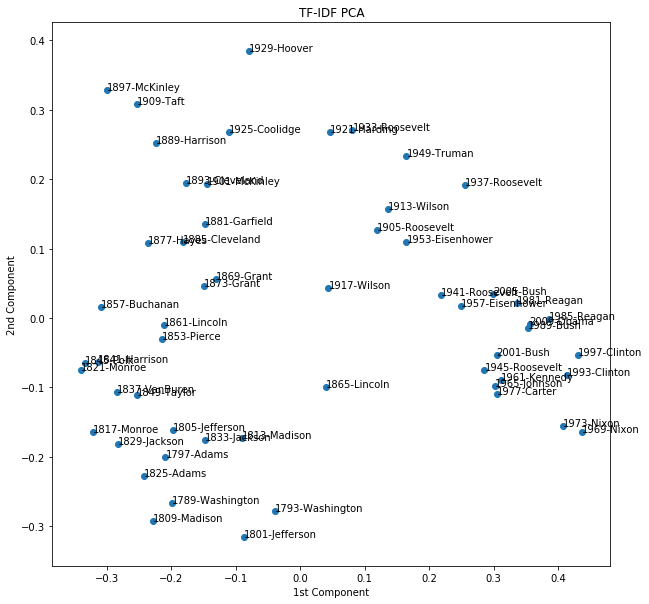

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(documents_tfidf.todense())
data2D = pca.transform(documents_tfidf.todense())

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(data2D[:,0], data2D[:,1])
ax.title.set_text('TF-IDF PCA')
ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
for i, txt in enumerate(inaugural.fileids()):
    ax.annotate(txt.replace('.txt',''), (data2D[i,0], data2D[i,1]))
plt.show()